<a href="https://colab.research.google.com/github/TerriDonut/Yandex-educational-projects/blob/main/exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Исследование объявлений о продаже квартир

<b>Введение:</b>

В распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир.

Целью проекта будет определение рыночной стоимость объектов недвижимости.

Предстоит провести исследовательский анализ данных, который поможет установить параметры, влияющие на цену объектов.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных.


##Шаг 1. Открытие файла с данными и изучение общей информации
---



In [ ]:
#Импорт необходимых бибилиотек
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

In [ ]:
#Вызов общей информации по данным
try:
    data = pd.read_csv('/content/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


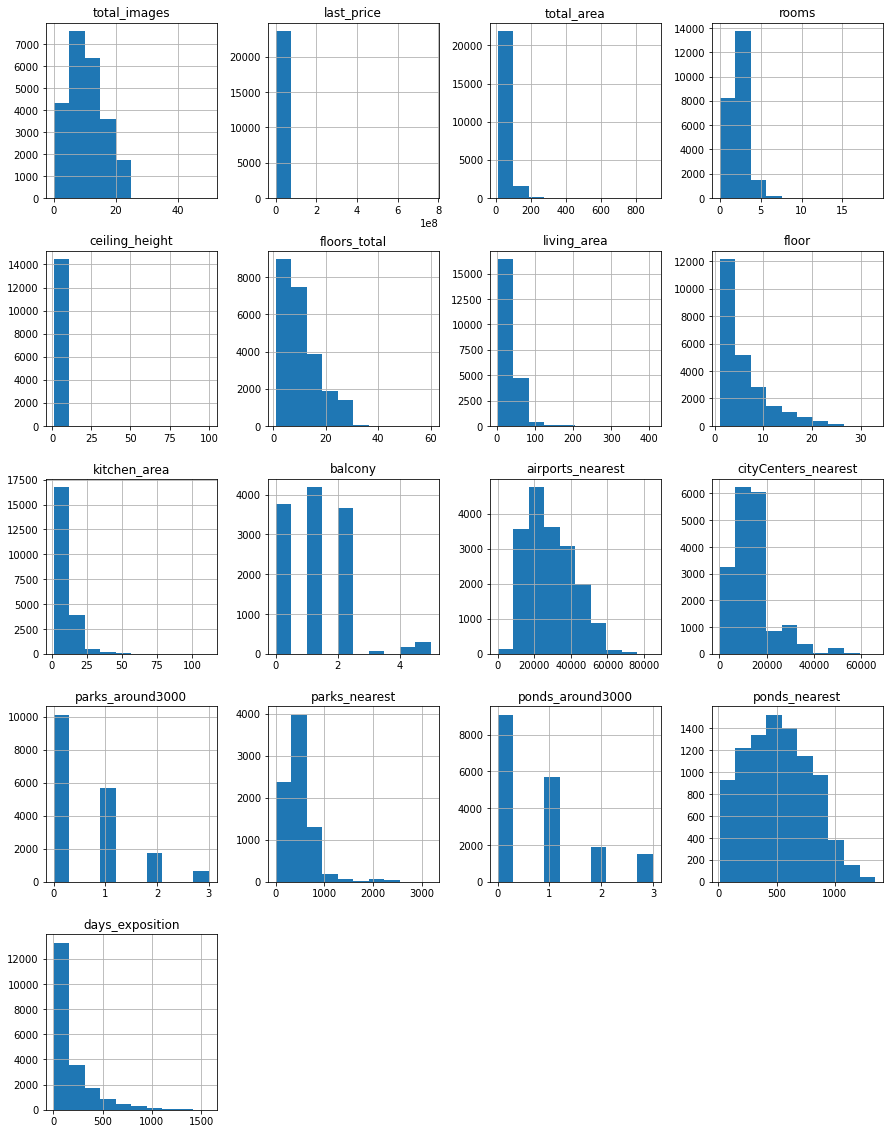

In [ ]:
#Построение гисторгаммы для визуализации данных
data.hist(figsize=(15, 20));

<b>Вывод по обзору данных:</b>
    
- Обнаруженно множество пропусков в данных
- Есть аномалии в некоторых столбцах (публикации объявлений сроком в 1день, максимальное значение в столбце высоты потолка равное 100)
- Присутствуют названия столбцов в стиле сamelCase

На этапе предобработки заменим или удалим пропущенные значения, изменим стиль обозначения столбцов

##Шаг 2. Предобработка данных

In [ ]:
#Вывод процента пропусков в данных
data.isna().mean()*100

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

<b>Вывод по количеству пропусков:</b>

- В данных собранных геосервисами наибольшее количество пропусков, это может быть связанно с отсутствием информации о локациях и местоположениях, то-есть неполной базой данных самих сервисов, проставим нулевые значения, при анализе по этому столбцу отфильтруем значениея на 1 >= ...
- В столбце 'апартаментов' (20к из 24к строк) пропусков, положительное значение данного столбца является не очень частым явлением в реальности, ведь апартаментов не так много в многоквартирных домах, в отсутствующие столбы выставляем False
- Отсутствие информации в столбце с балконами сведём к нулю, данный столбец заполнен информацией полученной от пользователей, пропуск в нем можно логически обосновать отсутствием балкона
- Высоту потолков найдём по значению медианы
- Общую площадь заполняем по значению медианы (в столбе есть значения раные 12 и 900, среднее значение может исказить данные)
- Жилую и площадь кухни найдём по соотношению к общей
- Общее количество этажей в здании заполняется пользователем, что-бы не указывать на то, что квартира размещена на последнем этаже, значение могло быть умышленно пропущено, пропуск в этом столбце приравниваем к этажу в строке
- Пропуски в столбце даты выставления объявления стоит исследовать

In [ ]:
#Приведение названия столбца к змеиному стилю
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

In [ ]:
#Заменяю пропущенные значения
replacement_values = {
    'total_area': data['total_area'].median(),
    'ceiling_height': data['ceiling_height'].median(),
    'floors_total': data['floors_total'] == data['floor'],
    'ponds_nearest': 0,
    'ponds_around3000': 0,
    'parks_nearest': 0,
    'parks_around3000': 0,
    'airports_nearest': 0,
    'city_centers_nearest': 0,
    'balcony': 0,
    'is_apartment': False
}

data = data.fillna(replacement_values)

In [ ]:
#Нахождение соотношения общей площади к площади кухни/жилой
median_kithen = (data['kitchen_area'].sum() / data['total_area'].sum().item())
median_living = data['living_area'].sum() / data['total_area'].sum().item()

#Замена пропусков в площади кухни/жилой
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * median_kithen).round()
data['living_area'] = data['living_area'].fillna(data['total_area'] * median_living).round()

В названиях населённых пунков много повторов "е" и "ё", это могло быть связанно с ошибками при вводе данных, исправлю это, а так же удалю все характеристики типа: "село", "деревня" и т.д. Останутся только названия населённого пункта

In [ ]:
#Исправляю дубликаты
data['locality_name'] = data['locality_name'].astype(str).str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].apply(lambda title: ' '.join(word for word in title.split(' ') if not(word.islower())))

In [ ]:
#Проверяю данные на наличие пропусков
print(data.isna().sum())
print()
print(data['locality_name'].unique())
print()
print('Количество дубликатов:', data['locality_name'].duplicated().sum())

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
city_centers_nearest       0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3181
dtype: int64

['Санкт-Петербург' 'Шушары' 'Янино-1' 'Парголово' 'Мурино' 'Ломоносов'
 'Сертолово' 'Петергоф' 'Пушкин' 'Кудрово' 'Коммунар' 'Колпино'
 'Красный Бор' 'Гатчина' 'Федоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'Новое Девяткино' 'Металлострой' 'Лебяжье' 'Сиверский' 'Молодцово'
 'Кузьмоловский' 'Новая Ропша' 'Павловск' 'Пикколово' 'Всеволожск'
 'Волхов

In [ ]:
#В названиях есть значение '', переименую
data['locality_name'] = data['locality_name'].replace('', 'Неизвестно')

In [ ]:
#Вывожу уникальные значения местоположения и количество дубликатов
print(data['locality_name'].unique())
print()
print('Количество дубликатов:', data['locality_name'].duplicated().sum())

['Санкт-Петербург' 'Шушары' 'Янино-1' 'Парголово' 'Мурино' 'Ломоносов'
 'Сертолово' 'Петергоф' 'Пушкин' 'Кудрово' 'Коммунар' 'Колпино'
 'Красный Бор' 'Гатчина' 'Федоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'Новое Девяткино' 'Металлострой' 'Лебяжье' 'Сиверский' 'Молодцово'
 'Кузьмоловский' 'Новая Ропша' 'Павловск' 'Пикколово' 'Всеволожск'
 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк' 'Куттузи' 'Аннино'
 'Ефимовский' 'Плодовое' 'Заклинье' 'Торковичи' 'Первомайское'
 'Красное Село' 'Понтонный' 'Сясьстрой' 'Старая' 'Лесколово' 'Новый Свет'
 'Сланцы' 'Путилово' 'Ивангород' 'Шлиссельбург' 'Никольское' 'Зеленогорск'
 'Сосновый Бор' 'Оржицы' 'Кальтино' 'Романовка' 'Бугры' 'Рощино' 'Кириши'
 'Луга' 'Волосово' 'Отрадное' 'Павлово' 'Оредеж' 'Копорье' 'Молодежное'
 'Тихвин' 'Победа' 'Нурма' 'Синявино' 'Тосно' 'Стрельна' 'Бокситогорск'
 'Александровская' 'Лопухинка' 'Пикалево' 'Терволово' 'Советский'
 'Подпорожье' 'Петровское' 'Токсово' 'Сельцо' 'Вырица' 'Кипень' 'Келози'
 'Вартемяги' 'Тельмана' '

In [ ]:
#Этот блок из 3 шага, но он нужен был тут для предобработки :/
#Создаю столбцы с информацией о дне/месяце/годе публикации
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])
data['week_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year

In [ ]:
#Оценка количества пропусков по годам

#Переменная с соотношением пропусков к году
exposition_null_counts = data.groupby('year_exposition')['days_exposition'].apply(lambda x: x.isnull().sum())
#Переменная с соотношением значений к году
exposition_counts = data.groupby('year_exposition')['days_exposition'].count()
#Переменная с процентным соотношением пропусков к значениям
percentage_of_absences = (exposition_null_counts / exposition_counts).round(2)

print(exposition_null_counts)
print()
print(exposition_counts)
print()
print(percentage_of_absences)
print()
#Выясняю правильность гипотезы
print(data['first_day_exposition'].max())

year_exposition
2014      18
2015      70
2016      67
2017     271
2018     959
2019    1796
Name: days_exposition, dtype: int64

year_exposition
2014     119
2015    1121
2016    2716
2017    7919
2018    7560
2019    1083
Name: days_exposition, dtype: int64

year_exposition
2014    0.15
2015    0.06
2016    0.02
2017    0.03
2018    0.13
2019    1.66
Name: days_exposition, dtype: float64

2019-05-03 00:00:00


<b>Пропуски в количестве дней публикации</b>

Сгруппировав данные о количестве пропусков по годам размещения, можно наблюдать аномальный рост пропусков в 2019 году, большая часть данных пропущена, делаю вывод что пропусков так много из-за остановки сбора на 5 месяце 19 года, видимо к этому моменту объявления из 18 и начала 19 года ещё не все были реализованны, поэтому пропуски в 2019 году можно не считать критичными, а доля остальных крайне незначительна что-бы искажать исследования, оставляю всё как есть

<b>Работа с типами данных</b>

Имеющиеся типы данных не везда подходят к данным в солбцах, например:
- Значение последней цены приведём к целому числу вместо дроби
- Количество этажей так-же переводим в целое число
- Водоёмы и парки в пределах 3км не могут быть представлены в виде дроби, меняем тип
- Количество балконов нужно перевести в целые значения

In [ ]:
#Изменение типов данных
data = data.astype({'last_price': np.int64
                    ,'floors_total': np.int64
                    ,'parks_around3000': np.int64
                    ,'ponds_around3000': np.int64
                    ,'balcony': np.int64})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

<b>Вывод по этапу предобработки данных:</b>

Данне оптимизировал, перевёл в удобный для работы формат, заполнил большее количество пропущенных значений с учётом их логичности и потенциального влияния на исследовательские выводы

##Шаг 3. Добавление в таблицу новых столбцов со следующими параметрами:

In [ ]:
#Добавляю в таблицу колонку с ценой квадратного метра
data['price_per_square_meter'] = (data['last_price'] / data['total_area']).round()
data['price_per_square_meter']

0        120370.0
1         82921.0
2         92786.0
3        408176.0
4        100000.0
           ...   
23694     72491.0
23695     52542.0
23696     44092.0
23697    149511.0
23698     41796.0
Name: price_per_square_meter, Length: 23699, dtype: float64

In [ ]:
#Создаю функцию которая проверяет значение 'этажа' в каждой строчке и распределяет их по категориям
def floor_category(row):
    if row['floor'] <= 1:
        return 'первый'
    if row['floor'] != row['floors_total']:
        return 'другое'
    return 'последний'

data['floor_type'] = data.apply(floor_category, axis=1)

In [ ]:
#Перевожу метры в км до центра города
data['city_сenters_nearest_km'] = (data['city_centers_nearest'] / 1000).round()
data['city_сenters_nearest_km']

0        16.0
1        19.0
2        14.0
3         7.0
4         8.0
         ... 
23694     4.0
23695     0.0
23696     0.0
23697    10.0
23698     0.0
Name: city_сenters_nearest_km, Length: 23699, dtype: float64

##Шаг 4. Проведение исследовательского анализа данных:

In [ ]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,week_exposition,month_exposition,year_exposition,price_per_square_meter,floor_type,city_сenters_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2,755.0,NaN,3,3,2019,120370.0,другое,16.0
1,7,3350000,40.4,2018-12-04,1,2.65,11,19.0,1,False,...,0.0,0,0.0,81.0,1,12,2018,82921.0,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.0,4,False,...,90.0,2,574.0,558.0,3,8,2015,92786.0,другое,14.0
3,0,64900000,159.0,2015-07-24,3,2.65,14,83.0,9,False,...,84.0,3,234.0,424.0,4,7,2015,408176.0,другое,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1,48.0,121.0,1,6,2018,100000.0,другое,8.0


count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


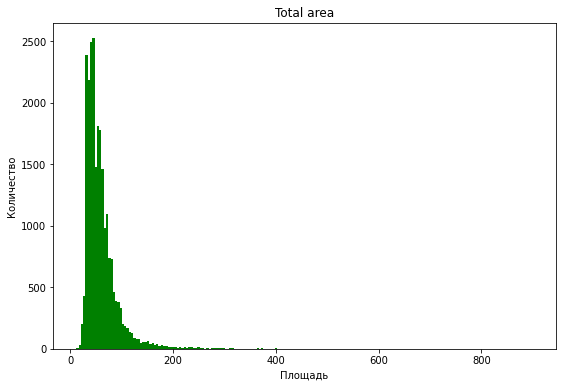

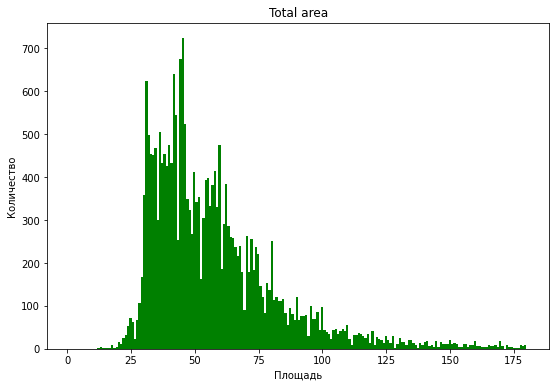

In [ ]:
#Строю гистограмму общей площади
print(data['total_area'].describe())

plt.figure(figsize=(9, 6))
plt.hist(data['total_area'], bins=200, color='green')

plt.xlabel('Площадь')
plt.ylabel('Количество')
plt.title('Total area')

plt.show()


plt.figure(figsize=(9, 6))
plt.hist(data['total_area'], bins=200, range=(1, 180), color='green')

plt.xlabel('Площадь')
plt.ylabel('Количество')
plt.title('Total area')

plt.show()

#Создаю столбец с отфильтрованными значениями
data['good_total_area'] = np.where(data['total_area'] < 180, data['total_area'], np.nan)

<b>Вывод по гистрограмме жилой площади:</b>

- График распределиения выглядит нормально, нет аномально больших просадок, те что иногда видны можно отнести к типовой застройке целых микрорайонов, где могут быть тысячи квартир одной площади.
- Максимльное значение в 900кв.м можно отнести к крайне редким исключениям, а минимум в 12кв.м к студии, оба значения имеют место в реальности
- После порога в 100кв.м предложений логично становится меньше, а самая популярная квадратура, как в реальности, так и на графике преобладает (значения от 30 до 70~80кв.м)

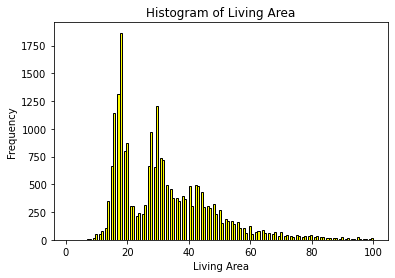

In [ ]:
#Построение гистограммы по жилой площади, сразу минимизирую выбросы и поставлю ограничение
plt.hist(data['living_area'], bins=150, range=(1, 100), color='yellow', edgecolor='black')

plt.xlabel('Living Area')
plt.ylabel('Frequency')
plt.title('Histogram of Living Area')

plt.show()
data['living_area'].describe()

#Создам выборку
data['good_living_area'] = np.where(data['living_area'] < 100, data['living_area'], np.nan)

<b>Вывод по гистрограмме жилой площади:</b>

В сравнении с гистрограммой общей площади наблюдается провал в значениях от 20 до 28-30кв.м, это может быть связано с переходом от 1к.кв или студий к 2к.кв, однушек с жилой площадью 20+ не так много, двушки соответственно появившись в данных задрали планку жилой площади, из-за чего и образовался провал, в меньшей степени наблюдается скачок в диапазоне 34~40кв.м, возможно это переход к 3к.кв

In [ ]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


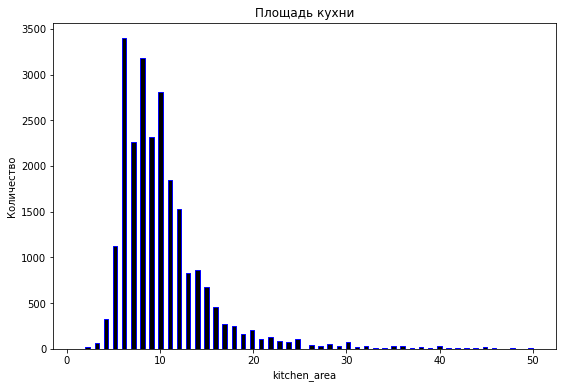

In [ ]:
#Гистограмма площади кухни
plt.figure(figsize=(9, 6))
plt.hist(data['kitchen_area'], bins=100, range=(1, 50), color='black', edgecolor='blue')

plt.xlabel('kitchen_area')
plt.ylabel('Количество')
plt.title('Площадь кухни')

plt.show()
data['kitchen_area'].describe()


#Создам выборку
data['good_kitchen_area'] = np.where(data['kitchen_area'] < 50, data['kitchen_area'], np.nan)

<b>Вывод по гистрограмме площади кухни:</b>

- Пик значений приходится на квадратуру до 10м, это может быть связанно с маленькими кухнями в постройках типа: панельки, сталинки, хрущёвки и прочие преобладающие в архитектуре особенно небольших городов
- Максимальные значения можно отнести к апартаментам
- Минимум в 1кв.м кажется аномальным, в студиях квадратура кухни не прописывается, но эта цифра может быть связана с возможными пропусками в столбце площади кухни (что логично в случае студии), которые я заполнил коэффициентом от общей площади

count    23699.000000
mean         6.541549
std         10.887013
min          0.012000
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: good_price, dtype: float64


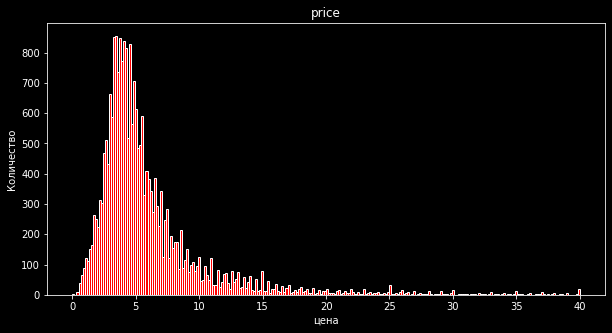

In [ ]:
#Рассмотрим цену
data['good_price'] = (data['last_price'] / 1000000).round(3)
print(data['good_price'].describe())

plt.style.use('dark_background')
plt.figure(figsize=(10, 5))
plt.hist(data['good_price'], bins=250, range=(0, 40), color='red', edgecolor='white')

plt.xlabel('цена')
plt.ylabel('Количество')
plt.title('price')

plt.show()

<b>Вывод по гистрограмме цены:</b>

- Максимальное значение цены кажется аномально большим, в десятки раз превосходя первые значения Q3, но они кажутся сопоставимы с площадью в 900кв.м, но в реальности объектов свыше 100млн крайне редко, плюс их редко покупают, да и по сравнению со всеми данными эти обхекты находятся в зоне выброса, не буду их рассматривать для дальнейших исслеований
- Пик значений приходится на 4-5млн., затем происходит постепенный спад, что соответствует предыдущим гистограммам
- Минимальное значение в 12к слишком мало для действительности, стоит рассматривать объекты стоимостью свыше 1млн.

In [ ]:
#Созданние данных для фильтрации и последующего анализа
data['min_good_price'] = np.where(data['good_price'] > 1, data['good_price'], np.nan)
data['max_good_price'] = np.where(data['good_price'] < 40, data['good_price'], np.nan)

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


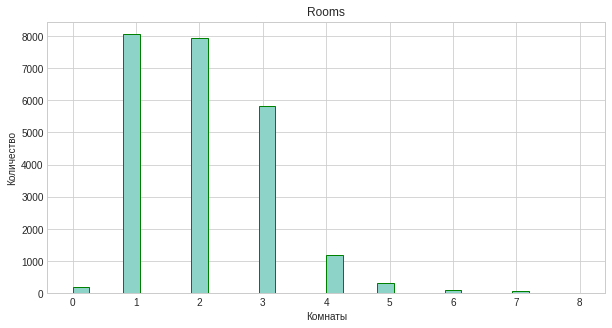

In [ ]:
#Количество комнат
print(data['rooms'].describe())

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 5))
plt.hist(data['rooms'], range=(0, 8), bins=30, edgecolor='green')

plt.xlabel('Комнаты')
plt.ylabel('Количество')
plt.title('Rooms')

plt.show()

#Создам выборку для дальнейших анализов
data['good_rooms'] = np.where(data['rooms'] < 8, data['rooms'], np.nan)

<b>Вывод по гистрограмме количества комнат:</b>

- Нулевые значения можно объяснить наличием студий в данных, собственник размещая объявление о продаже студии, мог указать нулевое количество из-за специфики данного вида жилья
- Спад после 3к.кв объясняется малым количеством в новостройках и домах старого фонда большего числа комнат
- Пиковое значение в 19 комант опят-же соотносим с квартирами площадью 500+

In [ ]:
#Оценка столбца
print(data['ceiling_height'].describe())
#Оценка уникальных значений
print(data['ceiling_height'].unique())
#Изменю значения потолка выше 10м, ведь они могли быть полученны ошибочно
data['ceiling_height'] = data['ceiling_height'].apply(lambda x: x / 10 if x > 10 else x)
#Проверка
print(data['ceiling_height'].describe())

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64
[  2.7    2.65   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     3.2    2.61   3.25   3.45   2.77   2.85   2.64
   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84   3.1
   2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.     2.58
   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6    2.92
   3.11   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53   2.74
   2.96   2.46   5.3    5.     2.79   2.95   4.06   2.94   3.82   3.54
   3.53   2.83   4.7    2.4    3.38   3.01   5.6    3.65   3.9    3.18
   3.35   2.3    3.57   2.48   2.62   2.82   3.98   2.63   3.83   3.52
   3.95   3.75   2.88   3.67   3.87   3.66   3.85   3.86   4.19   3.24
   4.8    4.5    4.2    3.36  32.     3.08   3.68   3.07   3.37   3.09
   8.   

count    23699.000000
mean         2.697798
std          0.237643
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64


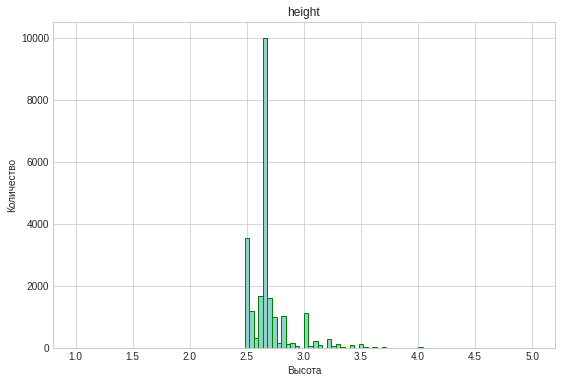

In [ ]:
#Высота потолков
print(data['ceiling_height'].describe())

plt.figure(figsize=(9, 6))
plt.hist(data['ceiling_height'], range=(1, 5), bins=100, edgecolor='green')

plt.xlabel('Высота')
plt.ylabel('Количество')
plt.title('height')

plt.show()

#Потолок меньше 2м и свыше 4м редкое явление, устраню их
data['good_height_min'] = np.where(data['ceiling_height'] > 2, data['ceiling_height'], np.nan)
data['good_height_max'] = np.where(data['ceiling_height'] < 5, data['ceiling_height'], np.nan)

<b>Вывод по гистрограмме высоты потолка:</b>

- Шагами выше уже исправил аномалии в данных
- В дальнейшем буду рассматривать потолки только > 2 и < 4м, остальные крайне редки
- Пик приходися на высоту 2,7; которая зачастую является эталоном при строительстве

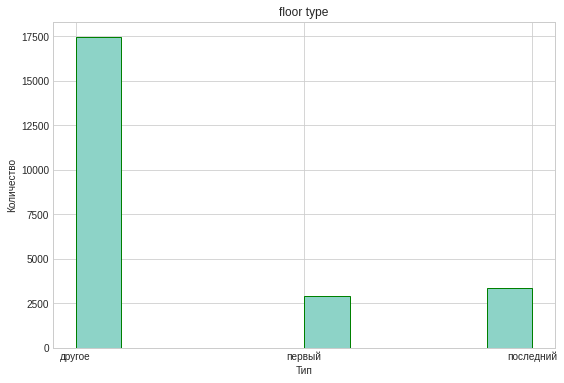

In [ ]:
#Тип этажа квартиры
plt.figure(figsize=(9, 6))
plt.hist(data['floor_type'], edgecolor='green')

plt.xlabel('Тип')
plt.ylabel('Количество')
plt.title('floor type')

plt.show()

<b>Вывод по гистрограмме типа этажа</b>

- Странности или аномалии отсутсвуют
- Преобладание "другого" типа этажа обусловленно тем, что условно в 5 этажке 3 из 5 значений будут "другого" типа (это средний этаж)

count    23699.000000
mean        10.635090
std          6.616396
min          0.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


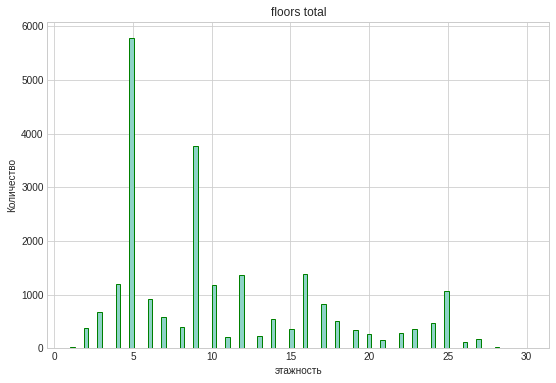

In [ ]:
#Этажность
print(data['floors_total'].describe())

plt.figure(figsize=(9, 6))
plt.hist(data['floors_total'], range=(1, 30), bins=100, edgecolor='green')

plt.xlabel('этажность')
plt.ylabel('Количество')
plt.title('floors total')

plt.show()

data['good_total_floors'] = np.where(data['floors_total'] < 30, data['floors_total'], np.nan)

<b>Вывод по гистрограмме количества жтажей</b>

- Преобладают пятиэтажки, являясь самым распространенным строением в большинстве городов, этим-же обусловлено и количество девятиэтажек
- Строения выше 30 этажей крайне редки, исключу их

count    23699.000000
mean     10886.426896
std       9634.613697
min          0.000000
25%       2242.000000
50%      11247.000000
75%      15248.500000
max      65968.000000
Name: city_centers_nearest, dtype: float64


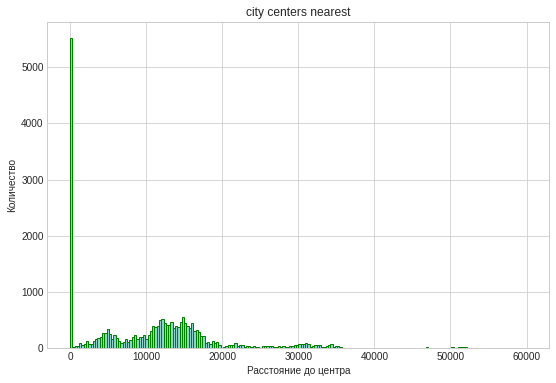

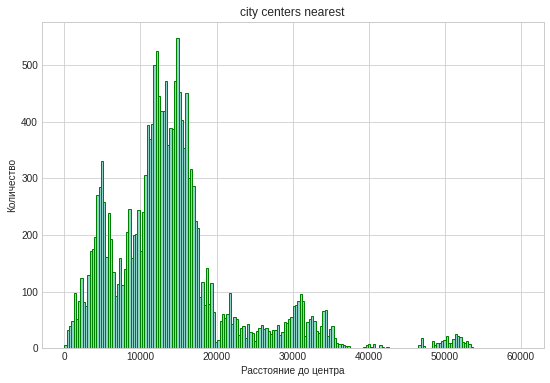

In [ ]:
#Расстояние до центра в метрах
print(data['city_centers_nearest'].describe())


plt.figure(figsize=(9, 6))
plt.hist(data['city_centers_nearest'], range=(0, 60000), bins=200, edgecolor='green')

plt.xlabel('Расстояние до центра')
plt.ylabel('Количество')
plt.title('city centers nearest')

plt.show()


#Расстояние без 0
plt.figure(figsize=(9, 6))
plt.hist(data['city_centers_nearest'], range=(1, 60000), bins=200, edgecolor='green')

plt.xlabel('Расстояние до центра')
plt.ylabel('Количество')
plt.title('city centers nearest')

plt.show()

#Создам столбец для фильтрации от 0
data['good_center_nearest'] = np.where(data['city_centers_nearest'] >= 1, data['city_centers_nearest'], np.nan)

<b>Вывод по гистрограмме расстояния до центра</b>

- Нулевые значения я на этапе предобрабоки поставил сам, сами пропуски, а теперь нули могут говорить о том, что здание в целом находится в центре, из-за чего и расстояние нулевое. В дальнейшем не буду опираться на нули, их слишком много, плюс в центре города не может быть значительно больше квартир, в отличии от отдаления в 1км и тд
- Максимальное количество квартир именно в пределах 2км от центра, может быть связанно с исторически сложившейся застройкой (муниципальные учреждения, театры/музеи, объекты культуры, парки, магазины и прочее в центре, а уже на периферии жилые квартары)
- Небольшие "всплески" на 3 и 6к могут быть связанны с расширением городов и застройкой новых жилых микрорайонов

count    23699.000000
mean       167.315499
std        306.709997
min          0.000000
25%          0.000000
50%          0.000000
75%        301.000000
max       3190.000000
Name: parks_nearest, dtype: float64


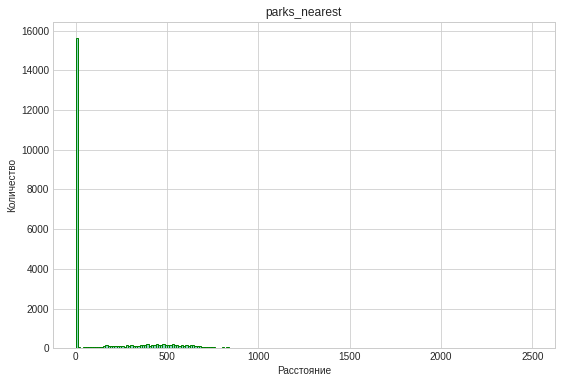

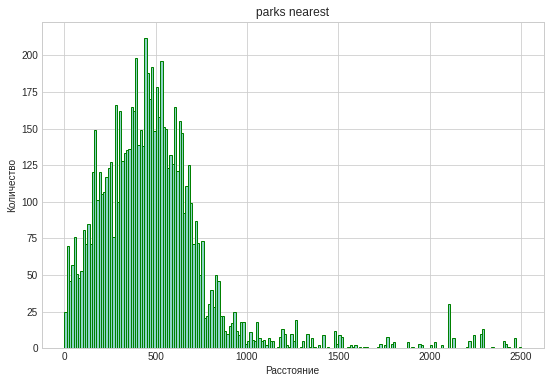

In [ ]:
#Расстояние до ближайшего парка
print(data['parks_nearest'].describe())

plt.figure(figsize=(9, 6))
plt.hist(data['parks_nearest'], range=(0, 2500), bins=200, edgecolor='green')

plt.xlabel('Расстояние')
plt.ylabel('Количество')
plt.title('parks_nearest')

plt.show()

#Расстояние без 0
plt.figure(figsize=(9, 6))
plt.hist(data['parks_nearest'], range=(1, 2500), bins=200, edgecolor='green')

plt.xlabel('Расстояние')
plt.ylabel('Количество')
plt.title('parks nearest')

plt.show()

#Создам столбец для фильтрации от 0
data['good_parks_nearest'] = np.where(data['parks_nearest'] >= 1, data['parks_nearest'], np.nan)

<b>Вывод по гистрограмме расстояния до парка</b>

- Снова множесто нулей, гипотеза о нахождении квартиры в парке не сработает, устраню эти значения
- Парки в большинстве случаев находятся в "шаговой" доступности (около 800м), что вполне сопоставимо с реальностью, гже парковые зоны находятся максимально близко к ЖК или желым секторам
- значения в 3км можно объяснить наличием одного парка в населённом пункте или же сама квартира находится на какой-либо окраине

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


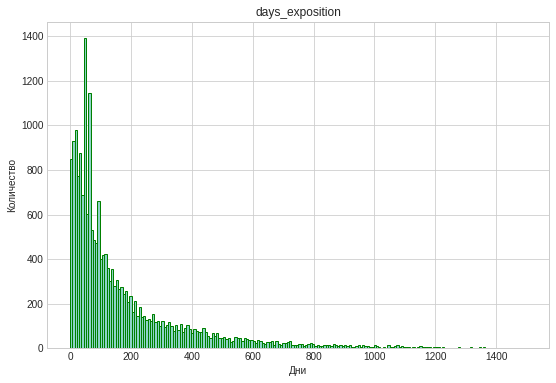

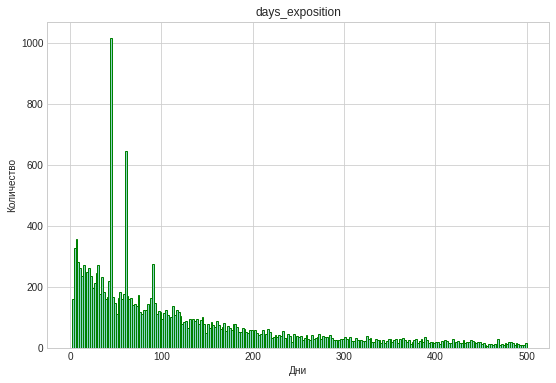

In [ ]:
#Построение графика скорости продаж
print(data['days_exposition'].describe())


plt.figure(figsize=(9, 6))
plt.hist(data['days_exposition'], range=(0, 1500), bins=200, edgecolor='green')

plt.xlabel('Дни')
plt.ylabel('Количество')
plt.title('days_exposition')

plt.show()


#Приближу дни
plt.figure(figsize=(9, 6))
plt.hist(data['days_exposition'], range=(0, 500), bins=250, edgecolor='green')

plt.xlabel('Дни')
plt.ylabel('Количество')
plt.title('days_exposition')

plt.show()

<b>Вывод по гистрограмме скорости продаж:</b>

- Максимальный срок продажи в 5 лет, можно объяснить наличием в базе объектов площадью < 300кв.м и стоимостью свыше 100млн, таких объектов крайне мало, но они создают огромные пиковые значения
- На графике заметны два скачка количества продаж во второй месяц. Логического обоснования этому нет, возможно многие собственники видя застой в реализации своей квартиры снижают цены, что и приводит к продаже, но маловероятно что так много нетерпеливых людей, в тоже время мало кто без срочности в деньгах или веских причин продаёт недвижимость
- На гистограмме наблюдается постепенный спад в количестве продаж зависящий от времени публикации, что вполне реально, интереснейшие предложения разбирают относительно быстро, оставляя некоторые квартиры ждать "своего" покупателя

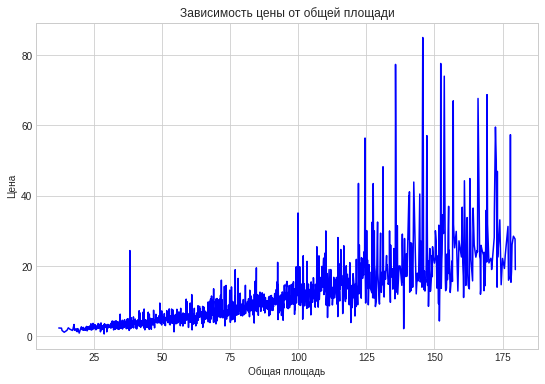

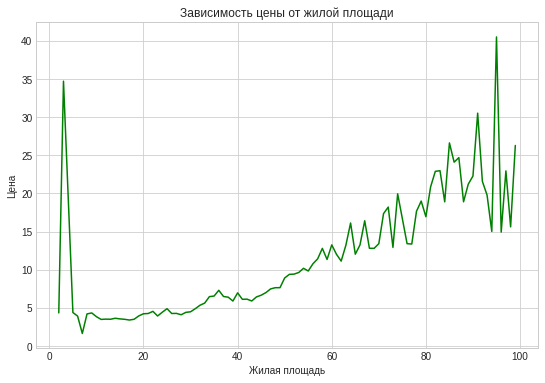

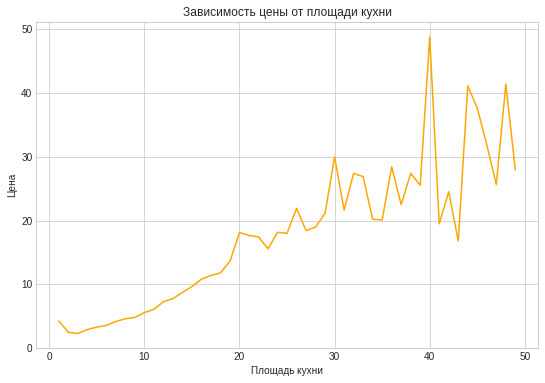

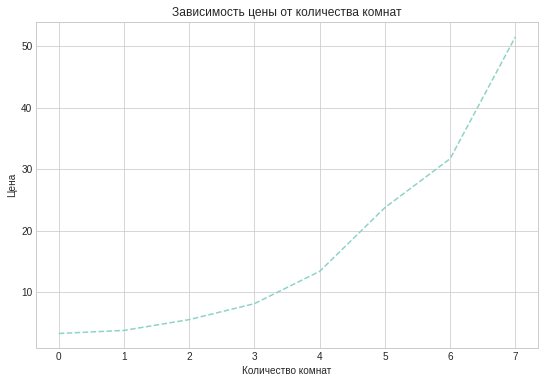

In [ ]:
# Создание сводных таблиц для анализа зависимости цены от некоторых из параметров
price_vs_total_area = data.pivot_table(index='good_total_area', values=['good_price'], aggfunc='mean')
price_vs_living_area = data.pivot_table(index='good_living_area', values='good_price', aggfunc='mean')
price_vs_kitchen_area = data.pivot_table(index='good_kitchen_area', values='good_price', aggfunc='mean')
price_vs_rooms = data.pivot_table(index='good_rooms', values='good_price', aggfunc='mean')

# Построение графиков
plt.figure(figsize=(9, 6))
plt.plot(price_vs_total_area.index, price_vs_total_area.values, 'b')
plt.xlabel('Общая площадь')
plt.ylabel('Цена')
plt.title('Зависимость цены от общей площади')
plt.show()

plt.figure(figsize=(9, 6))
plt.plot(price_vs_living_area.index, price_vs_living_area.values, 'g')
plt.xlabel('Жилая площадь')
plt.ylabel('Цена')
plt.title('Зависимость цены от жилой площади')
plt.show()

plt.figure(figsize=(9, 6))
plt.plot(price_vs_kitchen_area.index, price_vs_kitchen_area.values, 'orange')
plt.xlabel('Площадь кухни')
plt.ylabel('Цена')
plt.title('Зависимость цены от площади кухни')
plt.show()

plt.figure(figsize=(9, 6))
plt.plot(price_vs_rooms.index, price_vs_rooms.values, '--')
plt.xlabel('Количество комнат')
plt.ylabel('Цена')
plt.title('Зависимость цены от количества комнат')
plt.show()

<b>Вывод по соотношению цены к общей плошади:</b>

- По графику виден постепенный рост цены, со скачками на возможно квартиры в домах премиум класса или близко рассположенные к значимым объектам населённого пункта, а может с хорошим ремонтом, отклонения в цене непостоянны


<b>Вывод по соотношению цены к жилой плошади:</b>

- Заметен колоссальный скачок цены в диапазоне 5-8кв.м, но вспоминая гистограмму жилой площади, прихожу к выводу что это аномалия, нежели постоянная тенденция (в этом диапазоне значений площади практически нет объявлений, поэтому и скачок так заметен)
- Происходит постоянный рост цены, соразмерный росту площади

<b>Вывод по соотношению цены к плошади кухни:</b>

- Наблюдаю постоянный рост вместе с площадью
- Есть провал цены в диапазоне с 40 до 45, но объявлений с такой площадбю не так много, скачок кажется локальным

<b>Вывод по соотношению цены к количеству комнат:</b>
- Рост, с ускорением от 4комнат, но и предложений становится меньше после 3к.кв, это и может быть причиной ускоренного роста цены

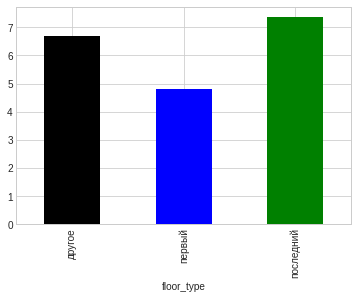

In [ ]:
#Оценка зависимости типа этажа от цены
data.groupby('floor_type')['good_price'].mean().plot.bar(color=['black', 'blue', 'green']);

<b>Вывод по оценке зависимости типа этажа от цены:</b>

- Неожиданно, но лидером по в цене является последний этаж, но следует учитывать моё вмешательство в наполнение этого столбца (ведь не указав этаж собственник мог и первый скрывать)
- Первый этаж оценивается дешевле всего из трёх категорий, минусов у первых этажей полно
- Средний - оценивается посередине

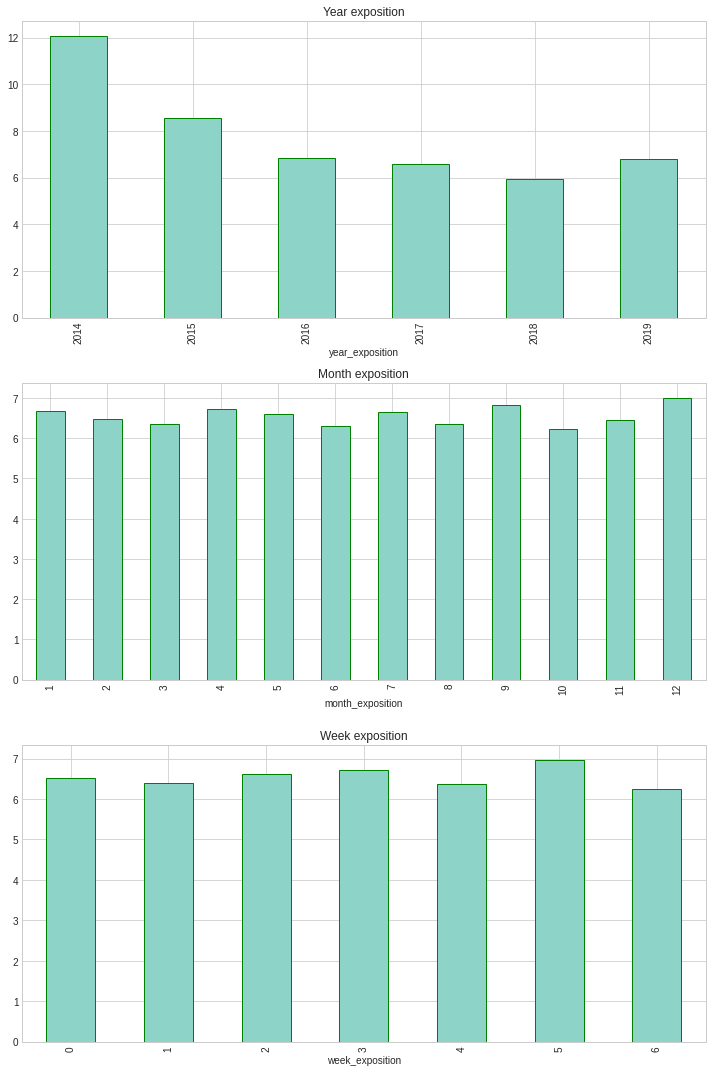

In [ ]:
#Создаю переменные с группировкой дней/месяцев/лет и цены
df_year = data.groupby('year_exposition')['good_price'].mean()
df_month = data.groupby('month_exposition')['good_price'].mean()
df_week = data.groupby('week_exposition')['good_price'].mean()

#Создаю фигуру в которой будут данные
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

#Строю таблицы
df_year.plot(kind='bar', ax=axs[0], edgecolor='green')
df_month.plot(kind='bar', ax=axs[1], edgecolor='green')
df_week.plot(kind='bar', ax=axs[2], edgecolor='green')

#Именую
axs[0].set_title('Year exposition')
axs[1].set_title('Month exposition')
axs[2].set_title('Week exposition')

#Задаю отступы, чтобы графики не перекрли друг-друга и вывожу таблицу
plt.tight_layout()
plt.show()

<b>Вывод о зависимости даты размещения:</b>

- Зависимость от года размещения снижается с начала наблюдений, в 14 году она наибольшая, после чего падает и в 19 снова начинает свой рост. Это можно обосновать событиями в 14 году и потрясениями для Российской экономики и последующей адаптацией

- Самое значительное влияние на цену оказывает январь и сентябрь, это можно соотнести со стрессом предшкольной подготовки родителей или близостью нового года с потенциальми расходами на торжества

- Субботние дни оказывают на формирование цены наибольшее влиние, многие именно на выходном принимают значимые решения.
Пятница и воскресенье оказывают на цену наименьшее влияние, возможно из-за близости выходных/рабочей недели

In [ ]:
# Создание сводной таблицы с количеством объявлений и средней ценой квадратного метра для каждого населенного пункта
ads = data.pivot_table(index='locality_name', values='price_per_square_meter', aggfunc=['count', 'mean'])

# Сортировка таблицы по количеству объявлений в порядке убывания
ads_sorted = ads.sort_values(by=('count', 'price_per_square_meter'), ascending=False)

#Вывод населённых пунктов с наибольшим количеством объявлений
ads_sorted.head(10)

,count,mean
,price_per_square_meter,price_per_square_meter
locality_name,,
Санкт-Петербург,15721,114849.005788
Мурино,590,86087.508475
Кудрово,472,95324.957627
Шушары,440,78677.379545
Всеволожск,398,68654.474874
Пушкин,369,103125.818428
Колпино,338,75424.571006
Парголово,327,90175.886850


In [ ]:
# Выделение населенных пунктов с самой высокой и низкой стоимостью квадратного метра
highest_price = ads_sorted.iloc[0]
lowest_price = ads_sorted.iloc[-1]

print("Населенный пункт с самой высокой стоимостью квадратного метра:")
print(highest_price)

print("Населенный пункт с самой низкой стоимостью квадратного метра:")
print(lowest_price)

Населенный пункт с самой высокой стоимостью квадратного метра:
count  price_per_square_meter     15721.000000
mean   price_per_square_meter    114849.005788
Name: Санкт-Петербург, dtype: float64
Населенный пункт с самой низкой стоимостью квадратного метра:
count  price_per_square_meter        1.0
mean   price_per_square_meter    27331.0
Name: Пустынка, dtype: float64


/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


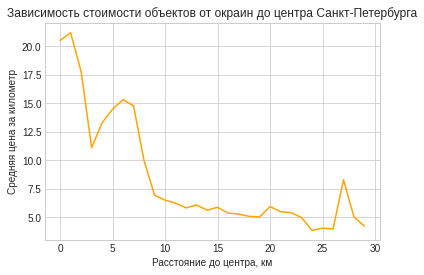

In [ ]:
# Выделение квартир в Санкт-Петербурге
spb_flats = data[data['locality_name'] == 'Санкт-Петербург']
spb_flats.loc[:, 'price_per_km'] = spb_flats['good_price'] / spb_flats['city_centers_nearest']

# Группировка данных по расстоянию до центра и вычисление средней цены
mean_price_by_km = spb_flats.groupby('city_сenters_nearest_km')['good_price'].mean()

# Построение графика
plt.plot(mean_price_by_km.index, mean_price_by_km.values, 'orange')
plt.xlabel('Расстояние до центра, км')
plt.ylabel('Средняя цена за километр')
plt.title('Зависимость стоимости объектов от окраин до центра Санкт-Петербурга')
plt.show()

<b>Вывод о зависимости стоимости объектов от окраин до центра Санкт-Петербурга:</b>

- Цена снижается с увеличением расстояния до центра города
- Также есть несколько скачков вверх, первый (от 3 до 7км) может обуславливаться наличием жилой застройки за пределами исторического центра, второй (около 28км от центра) загородной застройкой ЖК и новыми районами   

##Шаг 5. Общий вывод

<b>В результате выполнения проекта был проведён исследовательский анализ данных архива Яндекс Недвижимость</b>

В результате выполнения работы был проведён исследовательский анализ данных архива Яндекс Недвижимость

- Заменены пропуски в данных
- Созданы новые переменные для расчётов

- Установлены параметры влияющие на стоимость объектов недвижимости:
-- Удалённость от центра города (ключевой фактор роста цены при приближении к центру)
-- Количество комнат и площадь квартиры (с численным ростом данных параметров, возрастает и цена)
-- Время размещения публикации (на стоимость объектов недвижимости влияют не только месяцы и годы публикации, но даже дни, в пятницу или субботу одного года и месяца получается разная стартовая стоимость)
-- Этаж на котором расположена квартира (первые этажи оцениваются дешевле всего из-за ряда всем известных причин, последние этажи дороже всего, возможно из-за видов и ограниченности их количества в многоэтажках (12+ этажей), также в современных домах есть ещё "техничекий" этаж, что делает такие квартиры более востребованными и привлекательными)
-- Населённый пункт в котором рассположен объект недвижимости (например Пушкин и Колпино являются соседями по количеству объявлений, но имеют разницу в 25к за квадратный метр)

В данных собранных геосервисами большое количество пропусков или неточностей (нулевое расстояние до парка/аэропорта/центра города)